# Titanic Project

Este projeto foi realizado por **Ivan Garcia Guimarães**.

## Introdução

O famoso RMS Titanic foi um navio operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro já construido até então, considerado "inafundável" por muitos na época.

A embarcação partiu de inaugural de Southampton para Nova Iorque, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com 3327 pessoas a bordo entre passageiros e tripulação. Seu acidente levou a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

## Dados ultilizados

Aqui realizarei algumas análises sobre os dados encontrados [neste site](https://www.kaggle.com/c/titanic/data). Fazendo assim, algumas perguntas relacionadas ao acidente onde irei desenvolver ao longo do projeto. Vale resaltar que nestes dados há somente um a parcela dos passageiros na qual embarcaram no Titanic.

## Perguntas

As perguntas propostas por min para serem respondidas foram:
<ol>
    <li>A classe do passageiro influenciou na taxa de sobrevivencia?</li>
    <li>Qual sexo teve a maior taxa de sobrevivência?</li>
    <li>Qual faixa etária teve maior taxa de sobrevivência mais?</li>
    <li>Pessoas viajando com familiares tiveram um índice de sobrevivencia maior?</li>
    <li>Quais motivos foram decisivos no momento do naufrágio para a sobrevivencia?</li>
</ol>    

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

In [2]:
#Lendo arquivo
t_data = pd.read_csv('titanic-data-6.csv')

In [3]:
#Exibindo as informações do dataframe
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preparando os Dados

Observamos que há informações em nosso dataset onde não há necessidade para nós, por tanto, irei limpar ou melhor eliminar estas informações extras através do processo de eliminação de colunas. Pois, elas podem nos causar confusão na hora de analisarmos e diminui o uso de memória.

In [4]:
#Removendo colunas que não serão utilizadas
t_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1, inplace = True)
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Agora que eliminamos as colunas desnecessárias em nosso dataset, vamos modificar o nome das colunas para poder ter uma maior facilidade de entendimento e adequar ao nosso projeto.

In [5]:
#Alterando os nomes das colunas
t_data.columns = ['Vivo','Classe','Sexo','Idade','Parente_1','Parente_2']
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Vivo         891 non-null int64
Classe       891 non-null int64
Sexo         891 non-null object
Idade        714 non-null float64
Parente_1    891 non-null int64
Parente_2    891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Dataset constando apenas as colunas necessárias e devidamente identificadas, mas podemos observar que há valores faltantes em _'Idade'_, então vamos completa-las com valores médios entre as idades.

In [6]:
#Completando valores faltantes
mean = t_data['Idade'].mean()
t_data['Idade'].fillna(mean, inplace=True)

In [7]:
#Verificando alteração
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Vivo         891 non-null int64
Classe       891 non-null int64
Sexo         891 non-null object
Idade        891 non-null float64
Parente_1    891 non-null int64
Parente_2    891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Perfeito, não há mais nenhum valor faltando. Então agora vamos verificar como estão as informações dentro da nossa tabela.

In [8]:
#Observando tabela
t_data.head()

,Vivo,Classe,Sexo,Idade,Parente_1,Parente_2
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Observando a tabela podemos ver que a coluna _'Vivo'_ e _'Sexo'_ podem ser modificadas para maior clareza de visualização e também o valor da idade está em float pois há _'.0'_ após o número inteiro. Então vamos modificar-los.

In [9]:
#Alterando nomeclaturas e modificando a Idade de 'Float' para 'int'
t_data['Vivo'] = t_data['Vivo'].replace([0,1],['Nao','Sim'])
t_data['Sexo'] = t_data['Sexo'].replace(['male','female'],['Homem','Mulher'])
t_data['Idade'] = pd.to_numeric(t_data.Idade, errors='coerce').fillna(0).astype(np.int64, inplace=True)

In [10]:
#Verificando modificação
t_data.head()

,Vivo,Classe,Sexo,Idade,Parente_1,Parente_2
0,Nao,3,Homem,22,1,0
1,Sim,1,Mulher,38,1,0
2,Sim,3,Mulher,26,0,0
3,Sim,1,Mulher,35,1,0
4,Nao,3,Homem,35,0,0


## Dicionário de Dados

Aqui listarei uma breve explicação de cada item em nosso dataset para um maior entendimento. Segue abaixo:

</b>
<li>**Vivo:** Informa se o passageiro sobreviveu ou não ao naufrágio;</li>
<li>**Classe:** Informa a respeito da classe do ticket de embarque: 1 = 1°Classe, 2 = 2°Classe, 3 = 3°Classe;</li>
<li>**Sexo:** Informa o gênero do passageiro;</li>
<li>**Idade:** Informa a idade do passageiro;</li>
<li>**Parente_1:** Informa o tipo de relação familiar: Irmãos e Conjunges;</li>
<li>**Parente_2:** Informa o tipo de relação familiar: Pais e Filhos;</li>

## Visualização de Dados

Agora que nosso dataset está com todas as informações tratadas e claras para se trabalhar vamos iniciar as nossas análises.

### A classe do passageiro influenciou na taxa de sobrevivencia?

Como queremos descubrir qual classe teve uma maior taxa de sobrevivência, se teve alguma com uma variação significativa, então vamos separar-las entre: 1º classe, 2º classe e 3º classe.

In [11]:
#Observando a taxa de sobrevivência da 1º classe
vivo_1 = t_data.query('Classe == 1')
class_1 = vivo_1.groupby(['Vivo','Classe']).size()

In [12]:
#Observando a taxa de sobrevivência da 2º classe
vivo_2 = t_data.query('Classe == 2')
class_2 = vivo_2.groupby(['Vivo','Classe']).size()

In [13]:
#Observando a taxa de sobrevivência da 3°
vivo_3 = t_data.query('Classe == 3')
class_3 = vivo_3.groupby(['Vivo','Classe']).size()

Pronto, agora que descobrimos os valores vamos plotar os três gráficos em uma única imagem para uma maior facilidade na visualização e assim descobrirmos qual foram as diferencias entre elas. Lembre-se, estou procurando saber a taxa de sobrevivência então vamos ignorar os valores quantitativos. Pois, as três classes têm valores diferentes de passageiros, por tanto, iria causar um erro na hora de interpretar este dado.

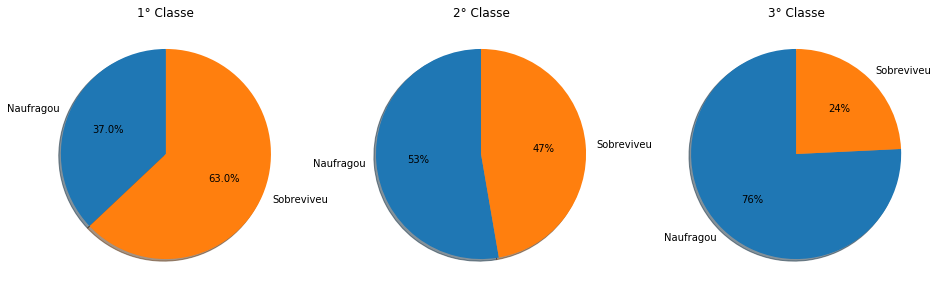

In [14]:
#Criando títulos
labels = 'Naufragou', 'Sobreviveu'

#Criando Grid
the_grid = GridSpec(1, 3)

#Pie chart 1
ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((class_1), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1° Classe')

#Pie chart 2
ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((class_2), labels=labels, autopct='%.0f%%', shadow=True, startangle=90)
ax2.set_title('2° Classe')

#Pie chart 3
ax3 = plt.subplot(the_grid[0, 2], aspect=1)
plt.pie((class_3), labels=labels, autopct='%.0f%%', shadow=True, startangle=90)
ax3.set_title('3° Classe')

#Especificando figura
fig1 = plt.gcf()
fig1.set_size_inches(16,16)

**Resposta:** sim, passageiros de *1º classe* tiveram uma taxa de 63% de sobreviveram enquanto *2º classe* cerca de 47% e *3º classe* cerca de 24%.

Agora sim por curiosidade vamos dar uma olhada nos valores quantitativos em cada classe para ver quantos passageiros naufragarão entre elas.

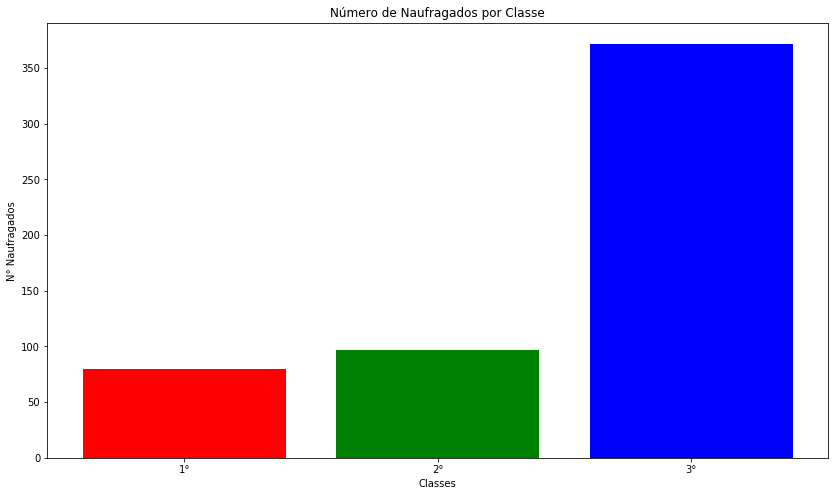

Primeira Classe: 80, Segunda Classe: 97  e Terceira Classe: 372


In [15]:
#Criando títulos e indicando variáveis
labels = ['1°', '2°', '3°']
values = [class_1.Nao.tolist()[0], class_2.Nao.tolist()[0], class_3.Nao.tolist()[0]]

#Criando bar chart
plt.figure(figsize=(14,8))
ind = np.arange(len(labels))
first, second, third = plt.bar(ind, values)
first.set_facecolor('r')
second.set_facecolor('g')
third.set_facecolor('b')
plt.xlabel('Classes')
plt.ylabel('N° Naufragados')
plt.xticks(ind, labels)
plt.title('Número de Naufragados por Classe')
plt.show()

#Indicando valores finais
print('Primeira Classe: %s, Segunda Classe: %s  e Terceira Classe: %s' % (class_1.Nao.tolist()[0], class_2.Nao.tolist()[0], class_3.Nao.tolist()[0]))

Podemos ver que a grande maioria dos passageiros eram da 3° classe, com mais de duas vezes a quantidade de naufragados se somar entre passageiros da 1° e 2° classe.
Por tanto, podemos concluir que definitivamente a classe do passageiro foi um fator muito determinante na sobrevivência do mesmo.

Isso se deu pelo fato de que as cabines da primeira classe foram arquitetadas para uma maior facilidade na locomoção entre a popa e a proa. As cabines da terceira classe eram localizadas nas partes traseira e frontal dos conveses na parte inferior do navio e as cabines de segunda classe eram situadas na popa, à partir da metade do navio entre os conveses intermediários.

### Qual sexo teve a maior taxa de sobrevivência?

Aqui vamos analisar a taxa de sobrevivência novamente, mas desta vez em relação aos sexos opostos. Irei mostrar ambos os gráficos na mesma imagem pois como dito anteriormente é mais fácil de visualizar e comparar os resultados.

Vamos iniciar achando os valores de cada sexo e após isto iremos mostrar os gráficos.

In [16]:
#Observando a taxa de sobrevivência do sexo masculino
vivo_h = t_data.query('Sexo == "Homem"')
data_h = vivo_h.groupby(['Vivo','Sexo']).size()

In [17]:
#Observando a taxa de sobrevivência do sexo feminino
vivo_m = t_data.query('Sexo == "Mulher"')
data_m = vivo_m.groupby(['Vivo','Sexo']).size()

Agora que achamos os valores para cada sexo, vamos montar os gráficos e interpretar os resultados.

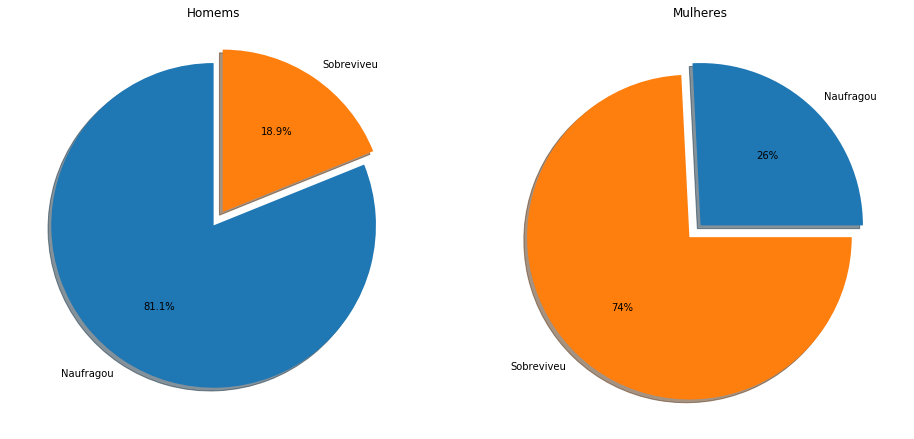

In [18]:
#Criando títulos
labels = 'Naufragou', 'Sobreviveu'

#Criando Grid
the_grid = GridSpec(1, 2)

#Indicando explosão
explode = (0, 0.1)

#Pie chart 1
ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((data_h),explode = explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Homems')

#Pie chart 2
ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((data_m),explode = explode, labels=labels, autopct='%.0f%%', shadow=True)
ax2.set_title('Mulheres')

#Especificando figura
fig2 = plt.gcf()
fig2.set_size_inches(16,16)

**Resposta:** O sexo femenino teve uma taxa de sobrevivência muito superior ao de masculino, *74% dos passageiros feminino* sobreviveram enquanto somente aproximadamente *19% dos passageiros masculinos* sobreviveram.

Bom, aqui irei apenas avançar para o próximo tópico pois veremos adiante uma relação muito intrigante entre este ponto e o próximo.

### Qual faixa etária teve maior taxa de sobrevivência mais?

In [19]:
#Verificando a quantidade de valores únicos
t_data.nunique()

Vivo          2
Classe        3
Sexo          2
Idade        71
Parente_1     7
Parente_2     7
dtype: int64

Aqui temos um problema, se fossemos procurar saber a taxa de sobrevivência por cada idade iriamos ter de montar 71 gráficos, o que é um absurdo, então vamos agrupar as idades em 3 diferentes grupos. Seguem os critérios abaixo:

</br>
<li>Jovens: até 17 anos;</li>
<li>Adultos: de 18 á 49 anos;</li>
<li>Idosos: 50 anos ou mais.</li>

In [20]:
#Observando a taxa de sobrevivência dos jovens
age_teen = t_data[t_data.Idade < 18]
teen = age_teen.groupby(['Vivo']).size()

In [21]:
#Observando a taxa de sobrevivência dos adultos
age_mid = t_data[(t_data.Idade <= 50)&(t_data.Idade >= 18)]
adults = age_mid.groupby(['Vivo']).size()

In [22]:
#Observando a taxa de sobrevivência dos idosos
age_old = t_data[t_data.Idade > 50]
old = age_old.groupby(['Vivo']).size()

Bom, agora que já separamos devidamente os grupos e achamos os valores, vamos mostrar os gráficos em uma única imagem

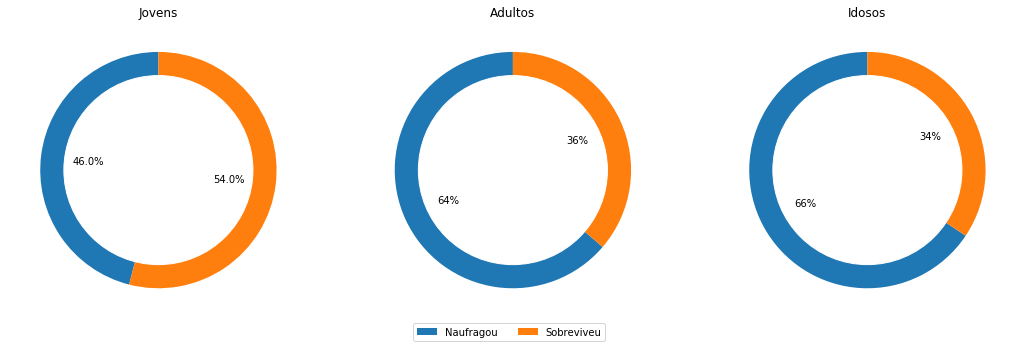

In [23]:
#Criando títulos
labels = 'Naufragou', 'Sobreviveu'

#Criando Circulo
circle1=plt.Circle( (0.0,0.0), 0.8, color='white')
circle2=plt.Circle( (0,0), 0.8, color='white')
circle3=plt.Circle( (0,0), 0.8, color='white')

#Criando figura
fig3 = plt.gcf()

#Criando Grid
the_grid = GridSpec(1, 3)

#Pie chart 1
ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((teen), labels=None, autopct='%1.1f%%', startangle=90)
fig3.gca().add_artist(circle1)
ax1.set_title('Jovens')

#Pie chart 2
ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((adults), labels=None, autopct='%.0f%%', startangle=90)
fig3.gca().add_artist(circle2)
ax2.set_title('Adultos')

#Criando legenda
plt.legend(labels, bbox_to_anchor=(0.83, 0.0), ncol = 2)

#Pie chart 3
ax3 = plt.subplot(the_grid[0, 2], aspect=1)
plt.pie((old), labels=None, autopct='%.0f%%', startangle=90)
fig3.gca().add_artist(circle3)
ax3.set_title('Idosos')

#Indicando tamanho
fig3.set_size_inches(18,18)

**Resposta:** A faixa etária que mais sobreviveu foram os *jovens menores de 18 anos*, com uma taxa de 54%, *adultos* até 50 anos com 36% e *idosos* acima dos 50 com uma taxa de 34%.

Novamente se analisarmos os critérios de locação dos passageiros veremos que mulheres e crianças ficavam na popa do navio em quanto os homens solteiros ficavam na proa assim separando os sexos opostos. Como a colisão foi no lado estibordo do navio (Frontal Direito), os homens foram os primeiros a serem atingidos em quanto os passageiros da popa (Traseira) tiveram mais tempo para reagir e escapar do naufrágio. Claro que tem o fator de darem preferência a mulheres e crianças no momento de fuga e resgate, mas definitivamente a posição das cabines foi um fator muito decisivo.

### Pessoas viajando com familiares tiveram um índice de sobrevivencia maior?

Neste ponto vamos analisar se pessoas acompanhadas de familiares sobreviveram mais ou menos do que as pessoas que estavam viajando sozinhas. Mas podemos observar que temos duas colunas para familiares um para irmãos/conjugues e outro para pais/filhos. Então, vamos ter que achar os valores em cada coluna e separa em dois grupos, acompanhados e desacompanhados.

In [25]:
#Observando a taxa de sobrevivência dos acompanhados de familiares
td_bro1 = (t_data[t_data.Parente_1 >= 1])
td_fam1 = (t_data[t_data.Parente_2 >= 1])

#Duplicados
Duplicados = td_dup1 = t_data[(t_data.Parente_1 >= 1) & (t_data.Parente_2 >= 1)]

#Total Acompanhados
familiar = (td_bro1.groupby(['Vivo']).size() + td_fam1.groupby(['Vivo']).size() - td_dup1.groupby(['Vivo']).size())

In [26]:
#Observando a taxa de sobrevivência dos desacompanhados de familiares
td_bro2 = t_data[t_data.Parente_1 == 0]
td_fam2 = t_data[t_data.Parente_2 == 0]

#Duplicados
td_dup2 = t_data[(t_data.Parente_1 == 0) & (t_data.Parente_2 == 0)]

#Total Desacompanhados
solo = (td_bro2.groupby(['Vivo']).size() + td_fam2.groupby(['Vivo']).size() - td_dup2.groupby(['Vivo']).size())

Agora que achamos os valores, vamos mostrar os gráficos e analisa-los.

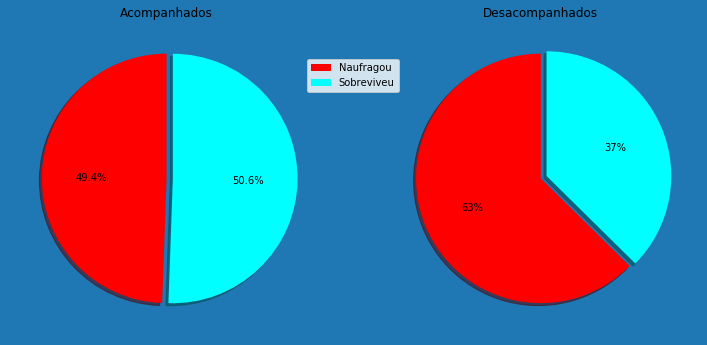

In [27]:
#Criando títulos
labels = 'Naufragou', 'Sobreviveu'

#Criando Grid
the_grid = GridSpec(1, 3)

#Indicando explosão
explode = (0, 0.05)

#Pie chart 1
ax1 = plt.subplot(the_grid[0, 0], aspect=1)
plt.pie((familiar), labels=None, autopct='%1.1f%%', shadow=True, startangle=90, colors=['red','cyan'], explode = explode)
ax1.set_title('Acompanhados')

#Pie chart 2
ax2 = plt.subplot(the_grid[0, 1], aspect=1)
plt.pie((solo), labels=None, autopct='%.0f%%', shadow=True, startangle=90, colors=['red','cyan'], explode = explode)
ax2.set_title('Desacompanhados')

#Criando legenda
plt.legend(labels, bbox_to_anchor=(0.06, 0.9))

#Especificando figura
fig4 = plt.gcf()
fig4.patch.set_facecolor('C0')
fig4.set_size_inches(19,19)

**Resposta:** Sim, pessoas acompanhadas de familiares tiveram uma taxa de aproximadamente 49% em quanto a de viajantes desacompanhados foram cerca de 37%. Porém, esta diferença foi muito pequena, por tanto, conclui-se que este fator não foi muito decisivo no momento do naufrágio, então é muito difícil dizer o porque desta pequena margem de diferença entre passageiros acompanhados e desacompanhados.

### Quais motivos foram decisivos no momento do naufrágio para a sobrevivencia?

**Resposta:** Entre os dados analisados podemos observar que, a idade,  o sexo e a classe do ticket foram os items mais relevantes em nossa analise. O fato do passageiro estar ou não acompanhado de familiares não foi um fator muito determinante. Por tanto, com base nos items relevantes e pesquisas feitas podemos concluir que, o real motivo foi a posição das cabines onde os passageiros estavam. Pois os passageiros que estavam na região do impacto ou próximo foram os que menos sobreviveram, em quanto os que estavam com fácil acesso a rota de fuga ou longe da área do impacto tiveram uma taxa de sobrevivência maior.

## Conclusão

Inicialmente irei justificar minhas escolhas dos dados analisados, tipos de gráficos e etc.

O foco que dei em minha análise foi descobrir quais fatores se deram para que um grupo X de indivíduos sobrevivessem e um grupo Y não. Então, foquei nos items na qual acreditei que poderiam influenciar na sobrevivência dos passageiros. 

Como o foco era achar taxa de sobrevivência, optei por utilizar gráficos do tipo "pie", pois na minha visão é o melhor gráfico para se enxergar porcentagem. Em quanto os gráficos do tipo "bar" são melhores para se ver os valores quantitativos e se por algum acaso estivesse procurando tendências iria utilizar um grafico do tipo "line" e assim por diante.

Para poder responder as perguntas propostas além dos valores obtidos, tive de fazer uma boa pesquisa a respeito de como foi o naufrágio, também como era a posição das cabines e suas divisões. Assim sendo, minhas respostas são análises baseadas em dados retirados de nosso dataset como também informações extras retiradas de textos em vários sites. Estes sites por sua vez, estão disponíveis nos links da seção "Bibliografia".

Agora em relação ao que podemos concluir com esta análise é, a localização dos passageiros no momento do acidente foi o motivo mais relevante na taxa de sobrevivência.

Mas então, por que não foi analisádo as cabines? Bom para responder isto, vamos voltar ao início de nossa análise. Quando vimos as 5 primeiras linhas de nosso dataset, podemos observar que havia muitos valores faltando na coluna da cabine, por tanto, seria muito difícil analisar isto com tantos valores faltantes, isso levaria a um erro de precisão muito grande em nossa análise, além do que, sabendo as cabines ainda teríamos que saber onde exatamente elas se localizavam dentro do navio o que sería muito difícil e não valendo apena para um dado tão incompleto.

Claro que existem outros motivos para estas taxas de sobrevivência, como valor social da época, onde provavelmente ricos, mulheres e crianças eram prioridades, em quanto os homens e pobres eram deixados de lado. Mas isso sería especulação pois não há documentos onde se diz que realmente houve este tipo de conduta. A única coisa que podemos realmente alegar de forma objetiva e clara são as cabines. Pois temos os valores analisados, textos dizendo a respeito da localização, imagens e descrição do acidente.

Com isto concluo minha análise e meu veredito final a respeito deste tópico de maneira clara e objetiva.

## Bibliografía

https://www.kaggle.com/c/titanic/data <br/>
https://pt.wikipedia.org/wiki/RMS_Titanic <br/>
http://titanicemfoco.blogspot.com/2011/10/dentro-do-titanic-uma-visao-geral.html <br/>
https://titanicosemacao.wordpress.com/2010/04/26/cabines-serie-luxos-do-titanic/ <br/>
https://pt.wikipedia.org/wiki/Instala%C3%A7%C3%B5es_da_segunda_e_terceira_classes_do_RMS_Titanic <br/>
https://pt.wikipedia.org/wiki/RMS_Titanic#Colis%C3%A3o